In [13]:
import pandas as pd
import numpy as np

In [5]:
# Importing the data
train_df = pd.read_csv('train_modified.csv')
test_df = pd.read_csv('test_modified.csv')

In [ ]:
# Defining the target and predict variables

In [10]:
target = 'Purchase'
IDCol = ['User_ID', 'Product_ID']

In [20]:
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, SCORERS

In [47]:
def model_fit(algo ,dtrain, dtest, predictors, outcome):
    algo.fit(dtrain[predictors], dtrain[outcome])
    # Predict on training set
    dpredictions = algo.predict(dtrain[predictors])
    
    #Perform cross-validation
    cv_score = cross_val_score(algo, dtrain[predictors], dtrain[outcome], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
#     print(cv_score)
    # Print model report
    print('Model Report')
    print("RMSE : %.4g" % np.sqrt(mean_squared_error((dtrain[outcome]).values, dpredictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    

In [27]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
LR =LinearRegression(normalize=True)

In [28]:
predictor_vars = train_df.columns.drop(['Purchase','Product_ID','User_ID'])

In [32]:
model_fit(LR, train_df, test_df, predictor_vars, target)

[4285.16111574 4311.35167166 4356.80177392 4360.31513262 4376.68537104
 4314.91672686 4360.16737358 4292.81634082 4337.37201076 4356.92981918
 4329.94061425 4366.18701266 4350.93174971 4314.21461134 4347.27348809
 4361.27912604 4391.67142892 4324.76086665 4321.09253494 4476.61472988]
Model Report
RMSE : 4341
CV Score : Mean - 4347 | Std - 40.31 | Min - 4285 | Max - 4477


In [36]:
coef1 = pd.Series(LR.coef_, predictor_vars).sort_values()

In [37]:
coef1

Product_Category_1           -573.757736
Marital_Status                -49.046349
User_ID_Count                  -0.627715
Product_Category_1_Count       -0.019263
Product_Category_3_Count        0.000401
Age_Count                       0.000668
Occupation_Count                0.000742
Product_Category_2_Count        0.007062
Product_ID_Count                2.342578
Occupation                      5.719560
Stay_In_Current_City_Years      9.675661
City_Category                  53.173677
Product_Category_2             66.330274
Product_Category_3             99.806241
Age                           169.058338
Gender                        421.624456
dtype: float64

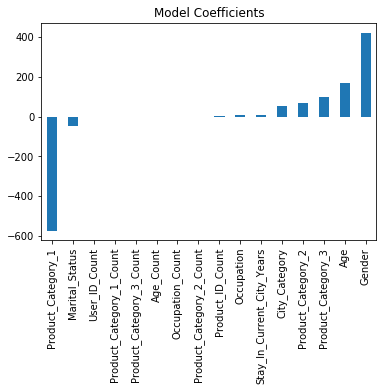

In [39]:
coef1.plot(kind='bar', title='Model Coefficients')

In [40]:
from sklearn.linear_model import Ridge

In [41]:
ridge = Ridge(alpha=0.5, normalize=True)

In [48]:
model_fit(ridge, train_df, test_df, predictor_vars, target)

Model Report
RMSE : 4449
CV Score : Mean - 4454 | Std - 99.09 | Min - 4379 | Max - 4869


In [57]:
coef2 = pd.Series(ridge.coef_, predictor_vars).sort_values()

In [58]:
coef2

Product_Category_1           -245.364101
Product_Category_2             -4.411877
Marital_Status                 -3.726561
User_ID_Count                  -0.569044
Product_Category_1_Count       -0.006520
Product_Category_2_Count       -0.001919
Product_Category_3_Count       -0.001439
Age_Count                       0.000197
Occupation_Count                0.000310
Product_ID_Count                1.533533
Occupation                      5.485512
Stay_In_Current_City_Years      8.474019
Product_Category_3             52.311321
Age                            74.977144
City_Category                  84.788614
Gender                        347.107836
dtype: float64

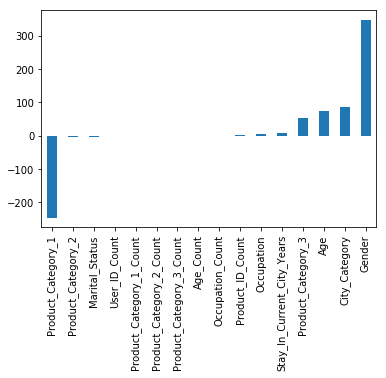

In [59]:
coef2.plot(kind='bar')

In [45]:
# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [61]:
model_fit(DT, train_df, test_df, predictor_vars, target)

Model Report
RMSE : 2667
CV Score : Mean - 2911 | Std - 814.3 | Min - 2689 | Max - 6460


In [64]:
coef3 = pd.Series(DT.feature_importances_, predictor_vars).sort_values()

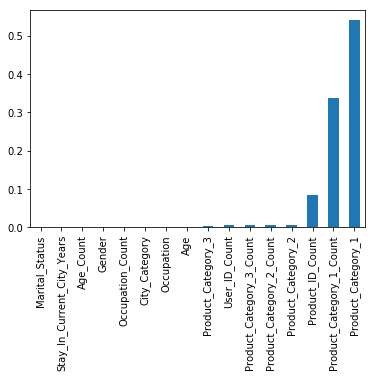

In [65]:
coef3.plot(kind='bar')